# Train the Model

In [ ]:
import torch
from train_model import train_model
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from model import build_hybrid_model
import pennylane as qml

STEP = 0.0004  # Learning rate
BATCH_SIZE = 4  # Number of samples for each training step
N_QUBITS = 4
NUM_EPOCHS = 3  # Number of training epochs
GAMMA_LR_SCHEDULER = 0.1  # Learning rate reduction applied every 10 epochs.
PARAMETER_FILEPATH = "state.pt" # 
IF_INITIAL_TRAIN = False # Whether this is the first time training the model

# Initialize Pennylane backend
dev = qml.device("default.qubit", wires=N_QUBITS)

# Initialize PyTorch config
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Model
model = build_hybrid_model(
    pennylane_dev=dev,
    device=device,
    n_qubits=N_QUBITS,
    q_depth=6,
    q_delta=0.01
)

if not IF_INITIAL_TRAIN:
    # Load Model Weights from Disk
    print("Loading Model Weights from Disk...")
    model.load_state_dict(torch.load(PARAMETER_FILEPATH))

# Define Loss for Training
criterion = nn.CrossEntropyLoss()
optimizer_hybrid = optim.Adam(model.fc.parameters(), lr=STEP)
exp_lr_scheduler = lr_scheduler.StepLR(
    optimizer_hybrid, step_size=10, gamma=GAMMA_LR_SCHEDULER
)

# Train the Model
trained_model = train_model(
    model=model, 
    criterion=criterion, 
    optimizer=optimizer_hybrid, 
    scheduler=exp_lr_scheduler, 
    num_epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    device=device
)

# Save Model Parameters to Disk
print("Saving Model Weights to Disk...")
torch.save(trained_model.state_dict(), PARAMETER_FILEPATH)

# Visualize a Batch of Predictions

In [ ]:
from helpers import visualize_model
import torch
from train_model import train_model
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from model import build_hybrid_model
import pennylane as qml

BATCH_SIZE = 4
N_QUBITS = 4
PARAMETER_FILEPATH = "state.pt"

# Initialize Pennylane backend
dev = qml.device("default.qubit", wires=N_QUBITS)

# Initialize PyTorch config
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Model
model = build_hybrid_model(
    pennylane_dev=dev,
    device=device,
    n_qubits=N_QUBITS,
    q_depth=6,
    q_delta=0.01
)

# Load Model Weights from Disk
print("Loading Model Weights from Disk...")
model.load_state_dict(torch.load(PARAMETER_FILEPATH))

visualize_model(
    model=model,
    device=device,
    batch_size=BATCH_SIZE
)

# Prediction Test

C:\Users\MaxHu\anaconda3\envs\quantum-env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\MaxHu\anaconda3\envs\quantum-env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


PREDICTION: Non_Demented


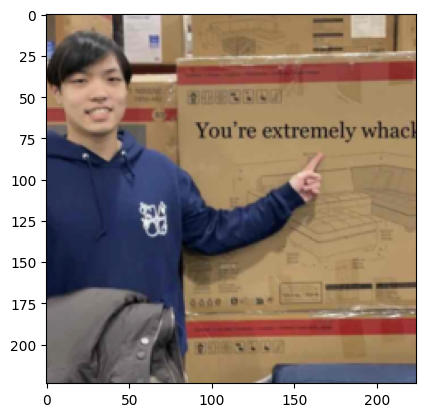

In [1]:
from generate_prediction import generate_prediction
pred = generate_prediction("./image.jpeg")
print("PREDICTION:",pred)